#   <u><font color=blue>__Course: Modeling & Computational Engineering (MOD510)__</font></u> 
##  <font color=blue>Professor: __Aksel Hiorth__ | Aksel.Hiorth@uis.no</font>
#### <font color=blue> https://github.com/ahiorth/CompEngineering</font>
## 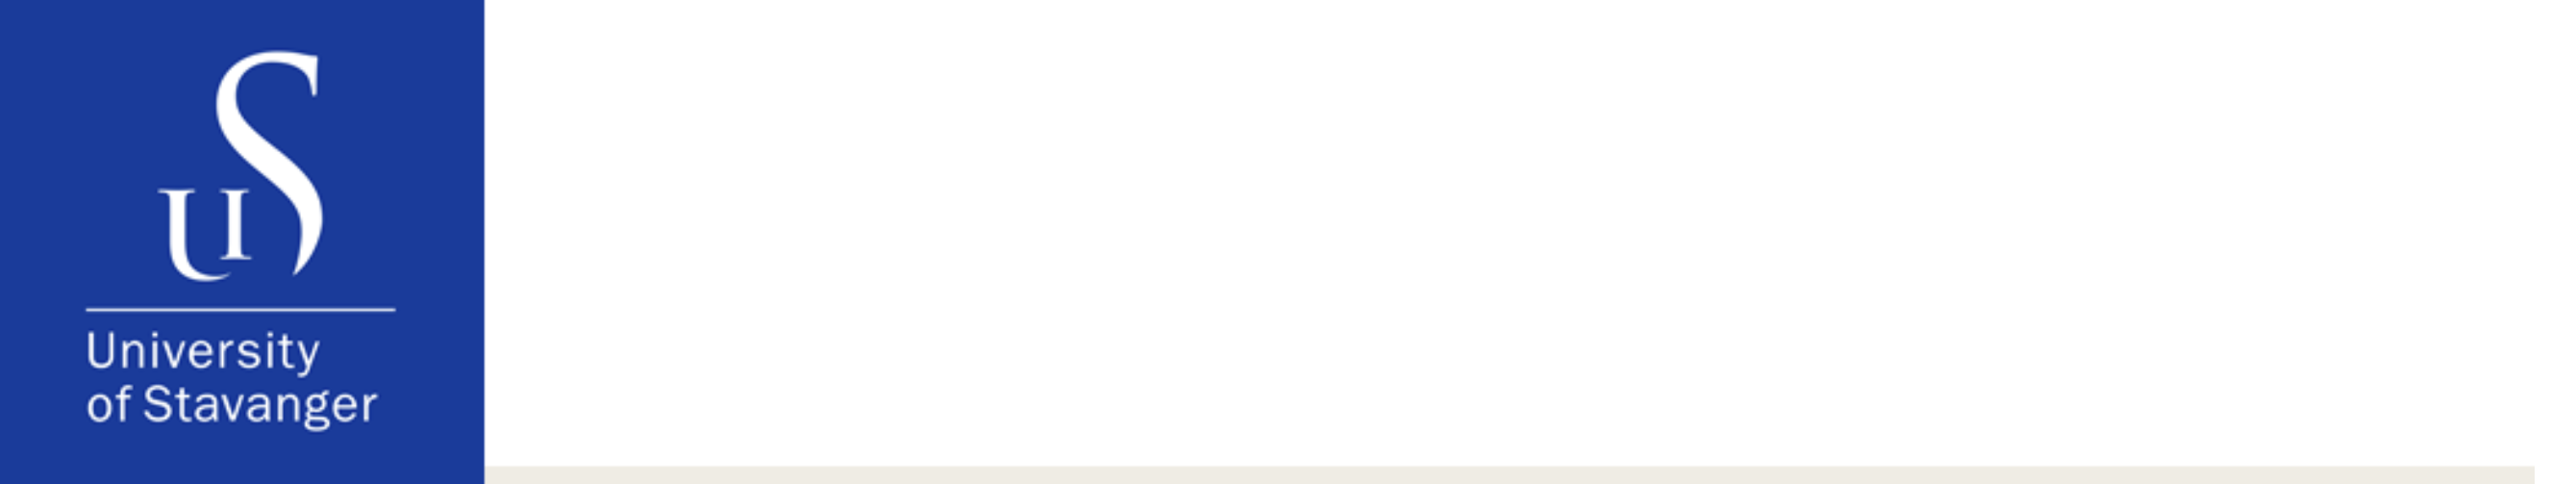
 


# <font color=green>Project 1 | MOD510</font> 


- Name: Aleksander Storhaug Strøm
- StudentNr: 239655


- Name: Vitalijus Gorbunovas 
- StudentNr: 261262


- Name: Eric Severson
- StudentNr:261873

#### The purpose of this project is to familiarize ourselves with the geneal application of Python to:
- Use standard and community-built Python libraries
- Writing custom (user-defined) functions
- Trying different approaches for data analysis, i.e. timing native function(s) efficieny vs efficiency of imported packages (numpy)
- Understand how round off / numerical error can affect the end result and compare that result to the analytical soluction
- Unerstand an example of a physical system such as a gravitation effect on an object
- Visualize the data using the matplotlib package in order to better understand the correlation of data in a grapical context


In [1]:
# Import from standard library:
import pathlib
import random

 # Import other stuff:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 # Packages needed for the last part? (uncomment to use):
import cmocean
import rockhound as rh
import xarray as xr

## Excercise


### Part 1

In [2]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

* max=1.7976931348623157e+308 
* min=2.2250738585072014e-308  
* epsilon=2.220446049250313e-16

max is the largest finite + number that can be represented as type (float). Min is the smallest - number rep. by a float, and epsilion is substraction of 1.0 and the smallest number greater than 1.0 still of type (float)

https://docs.python.org/3/library/sys.html

- Describes the maximum AND minimum expontential power min_exp=-1021 and max_exp=1024, a computer-driven system may have to compute the the maximum and minimum value a computed value can have whereas max=1.7976...e+308 and min=2.2250...e-308. 
- Max_10_exp=308 and min_10_exp=-308 represents the maximum and minimum values these power exponents to the global max and min values can have. 
- The mant_dig=53 informs how many fractionalbits of the system(in this case 64 bits) which can be utilizied in computing fractional values.

- To obtain the epsilon calculation you will have to use only the fractional bits of the system therefore 
 - `Epsilon=print(2**(-52)) =2.220446049250313e-16`
- To obtain maximum value you have to utilize the formula =1.F*2**(E-1023). 1023 is derived by in 64bit system by 2**11-1=1023
  - `Max=2**1023`
  - `bit=2-2**(-52)`
  - `y=Max*bit = 1.7976931348623157e+308 `

- To obtain minimuim value use similar procedure just towards negative infinte direction. Exponent 1022 is obtain by 2**(F-1023),
 - hence that F=1
 - `Min=2**(-1022)`
 - `print(Min) = 2.2250738585072014e-308`

### Part 2

In [3]:
a = 1
b = a/30
b *= 30
print('Is a={} equal to b={}?: {}.'.format(a, b, a==b))


Is a=1 equal to b=1.0?: True.


`a` is integer, therefore printed without decimal point

`b` is float, therefore printed with decimal point

`a==b` compares the values of `a` and `b` regardless of data type


### Part 3

In [4]:
a = 1
b = a/30
b *= 30
print('Is a={} equal to b={}?: {}.'.format(a, b, a==b))

#Correction
def isclose(a,b,rel_tol=1e-09,abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

isclose(a,b)

# This function utilizes a more precise degree of comparison to determine if A and B are in fact equal,
# and thus returns true. This is contingent on the value "rel_tol".


Is a=1 equal to b=1.0?: True.


True

 Since numbers are stored in binary format, it is not possible to represent some decimal value(s) correctly as binary numbers due to a limited precision.

When adding `0.1` and `0.2`, the differences in these two numbers' binary representation amounts to being slightly different from `0.3`.

In this case, `0.1 + 0.2` is equal to `0.30000000000000004`.


## Excercise 2

### Part 1

In [5]:
import numpy as np
import random 
def draw_random_values_using_for_loop(list_of_numbers, N):
    drawn = []
    for i in range(N):
        drawn.append(random.choice(list_of_numbers))
    return drawn
def draw_random_values_using_list_comprehension(list_of_numbers, N):
    return [random.choice(list_of_numbers) for _ in range(N)]
N = 10
M = 3
list_of_numbers = [i+1 for i in range(M)]
%timeit draw_random_values_using_for_loop(list_of_numbers, N)
%timeit draw_random_values_using_list_comprehension(list_of_numbers, N)
%timeit random.choices(list_of_numbers, k=N)
%timeit np.random.choice(list_of_numbers, size=N)


10.8 µs ± 795 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.1 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.43 µs ± 233 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
39.9 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


A: In the code we choose 10 random values from the non-empty array [1, 2, 3] with 4 different approaches. The efficiency (execution time) of each approach is measured using timeit module.

Even the slowest approach with native `random` module outperforms the `numpy.random` implementation at a low iteration interval.

When comparing 3 aproaches with the native `random` module, it is obvious that utilizing the `choises` method has advantage over 2 user-defined functions, that use `range` to iterate through random picks `N`. When this functions are transistion over to a higher iteration interval, it becomes clear that `np.random.choice` is the most efficient function to work with high number of iterations (M=3000 & N=10000). However, `random.choices` is excellent in low iteration intervals.

- M=3 & N= 10
 - draw_random_values_using_for_loop= 14.3 µs ± 1.18 µs per loop. 
 - draw_random_values_using_list_comprehension= 13.4 µs ± 290 ns per loo
 - random.choices(list_of_numbers, k=N)= 6.55 µs ± 65.8 ns per loop  
 - np.random.choice(list_of_numbers, size=N)= 56.5 µs ± 4.7 µs per loop 
- M=30 & N=100
 - draw_random_values_using_for_loop= 133 µs ± 15 µs per loop
 - draw_random_values_using_list_comprehension= 116 µs ± 1.58 µs per loo
 - random.choices(list_of_numbers, k=N)= 44.5 µs ± 1.33 µs per loop 
 - np.random.choice(list_of_numbers, size=N)= 64.1 µs ± 5.07 µs per loop
- M=300 & N=1000
 - draw_random_values_using_for_loop= 1.44 ms ± 20.8 µs per loop
 - draw_random_values_using_list_comprehension= 1.4 ms ± 99.7 µs per loo
 - random.choices(list_of_numbers, k=N)= 432 µs ± 8.41 µs per loop
 - np.random.choice(list_of_numbers, size=N)=  159 µs ± 19.6 µs per loop
- M=3000 & N=10000
 - draw_random_values_using_for_loop= 14.8 ms ± 791 µs per loop 
 - draw_random_values_using_list_comprehension= 14.1 ms ± 1.53 ms per lo
 - random.choices(list_of_numbers, k=N)=  4.41 ms ± 149 µs per loop
 - np.random.choice(list_of_numbers, size=N)= 880 µs ± 20.2 µs per loop 

## Part 2

In [6]:
index = np.arange(1000)
array_of_zeros = np.zeros(20)
array_of_ones = np.ones(20)
evenly_spaced_numbers = np.linspace(0, 10, 11)
evenly_spaced_numbers2  = np.linspace(0, 10, 11, endpoint=False)


Q: Explain each of the above commands.

A:

`index = np.arange(1000)` produces an array of `1000` evenly spaced integers, starting at `0` and step equal to `1`, i.e. `[0, 1, ..., 998, 999]`;

`array_of_zeros = np.zeros(20)` produces an array of `20` zeros. Default type of produced values is `float`;

`array_of_ones = np.ones(20)` produces an array of `20` ones. Default type of produced values is `float`;

`evenly_spaced_numbers = np.linspace(0, 10, 11)` produces an array of `11` evenly spaced numbers, starting at `0` and ending at `10`; 

`evenly_spaced_numbers2 = np.linspace(0, 10, 11, endpoint=False)` produces an array of `11` evenly spaced numbers, starting at `0` and ending at `10`, however `10` (last sample) is not included;

Q: How would you go about doing the same things with native Python lists?

A: Using `range` function or `while`/`for` loops;

The following is an example of custom implementaion of the `np.arange` method.

Note: We are not handling default values for `start` and `step`, therefore `start`, `stop` and `step` must be provided.

In [7]:
def custom_arange_using_while_loop(start, stop, step):
    result = []
    while start < stop:
        result.append(start)
        start += step
    return result

custom_arange_using_while_loop(0, 10, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Part 3

In [8]:
example_array = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34])

idx_of_ones = np.where(example_array == 1)
print(example_array[idx_of_ones])
is_equal_to_eight = (example_array == 8)
print(example_array[is_equal_to_eight])
new_example_array = np.where(example_array == 1, example_array, 0)
random_ndim = np.random.randint(100, size=(5,5))
nnz = np.count_nonzero(random_ndim)


[1 1]
[8]


Q: Explain what each line of code does.

A: 

`idx_of_ones = np.where(example_array == 1)` produces an array with indices of matched value, i.e. indices of `1` in the `example_array` array; The resulting array of indices is `[0, 1]`;

`print(example_array[idx_of_ones])` prints a portion (a slice?) of `example_array` array, where indices of the `example_array` array match with the values provided in `idx_of_ones` array;

`is_equal_to_eight = (example_array == 8)` produces an array of `True` and `False` values, where length of the array is equal to the length of `example_array` array; What value will be in each position in the new array is determined by comparing each value in the `example_array` array with the test value `8`. If values are equal, then we `True` will be the value in the same position of the new array;

`print(example_array[is_equal_to_eight])` prints a portion (a slice?) of `example_array` array, where values of the `is_equal_to_eight` array are equal to `True`;

`new_example_array = np.where(example_array == 1, example_array, 0)` produces an array with values from the `example_array` array when value equals `1`, otherwise value is set to `0`;

`random_mdim = np.random.randint(100, size=(5,5))` produces a 2-dimentional array; The length of the array is equal to `5`, i.e. `random_mdim` has 5 elements; Each element in the array is an array of `5` random integers, raging from `0` to `99`.

`nnz = np.count_nonzero(random_mdim)` counts non-zero value in the `random_mdim` array;

### Part 4

Q: How can we explain what happens in the code below?

A: Each value in the `[1, 2, 3, 4, 5]` array is multiplied by `2`; The resulting array is stored in the `result` variable;

In [9]:
vector = np.array([1, 2, 3, 4, 5])
result = 2*vector
print(result)

[ 2  4  6  8 10]


### Part 5

The text file `riccioli.dat` contains data [1] for experiments in which a clay ball was dropped from a high tower, and subsequently experienced free fall. For each recorded time, the estimated distance traveled has been reported in units of `Roman feet` \footnote{These are very old measurements....}.

- Read the data into a Pandas data frame object (tip: use the function pd.read_csv).
- Make a scatter plot in which you distinguish between the different experiments with different markers and/or colors.

In [10]:
#The panda function imports the datapackage from the current directoary where 
#this jupyter file is located, and will import riccioli.dat file from the data
# foler in the same directoary.
df = pd.read_csv("data/riccioli.dat", sep="\t", skiprows=8)

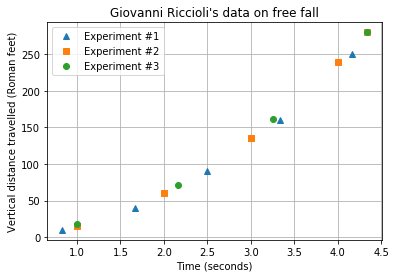

In [11]:
fig, ax = plt.subplots()
ax.set_title('Giovanni Riccioli\'s data on free fall')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Vertical distance travelled (Roman feet)')

#To plot the data that corrosponds to each Experiment, there is a need to specify
#the specific experiment the data belongs to. Therefore divides data into
#Experiment == 1--2--3
plt.plot('Time', 'Distance', data=df.loc[df['Experiment'] == 1], \
         marker='^', linewidth=0, \
         label='Experiment #1')
plt.plot('Time', 'Distance', data=df.loc[df['Experiment'] == 2], \
         marker='s', linewidth=0, \
         label='Experiment #2')
plt.plot('Time', 'Distance', data=df.loc[df['Experiment'] == 3], \
         marker='o', linewidth=0, \
         label='Experiment #3')

plt.grid(True)
plt.legend()
plt.show()

With these 3 different experiments we have experimental `time vs distance` data points, and as we can see they follow a general trend of gravitaional pull effect. 

## Excercise 3

### Part 1
Write a Python function that returns the analytical solution, equation (2), for any values of t, x0, v0, and g.

In [12]:
def height_above_ground(t, x0=10.0, v0=0.0, g=9.81):
    """
    Calculates the height above ground of an object experiencing
    vertical motion in a constant gravitational field.

    :param t: Time in seconds. Can be a single number, or an array.
    :param x0: Initial height of the object (default: 10.0 m).
    :param v0: Velocity at time zero (>0 for downward direction)
               (default: 0 m/s).
    :param g: Gravitational constant (default: 9.81 m/s^2).
    :return: The height above ground at time(s) t (m).
    """
    return  x0 - v0 * t - 1/2 * g * t ** 2

# s is a single number
s = 2
print(height_above_ground(s))

# s is a numpy array
s = np.array([1, 2, 3, 4, 5])
print(height_above_ground(s))

-9.620000000000001
[   5.095   -9.62   -34.145  -68.48  -112.625]


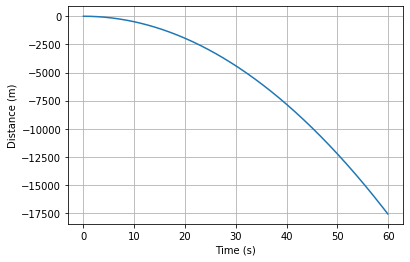

In [13]:
t = np.arange(0,60,0.1)

fig, ax = plt.subplots()

ax.plot(t, height_above_ground(t))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance (m)')
ax.grid(True)


- From the s = np.array into the gravitational function we can observe that the the object will reach 10 meters somewhere between 1-2 seconds after exposed to freefall.
- The graph is showing the distance moved when an object experiences freefall for 60 seconds, and it is possible to read the theoretical moved distance, when excluding wind resistance, etc.

### Part 2

In [14]:
def height_above_ground_numerical(t_f, h, x0=10.0, v0=0.0, g=9.81):
    """
    :param t_f: Maximum simulation time (seconds).
    :param h: Constant time step (seconds).
    :param x0: Initial height of the object (default: 10.0 m).
    :param v0: Velocity at time zero (>0 for downward direction)
               (default: 0 m/s).
    :param g: Gravitational constant (default: 9.81 m/s^2).
    :return: A tuple of arrays (t, x(t)) containing the numerical
             solution at times 0, h, 2*h, 3*h, ..., N*h <= t_f.
    """
    
    #t_array = np.arange(0, t_f, h)
    #t_array = np.linspace(0, t_f, int(t_f/h+1), endpoint=True)
    #t_array = [i for i in range(0, t_f + h, h)]
    
    t = 0
    t_array = []
    
    
    """This function will run when t less or eqaul to t_f value, and will continue
        to increase t until t_f this icrease by the stepsize."""
    
    while t <= t_f:
        t_array.append(t)
        t += h
    
    
    """Based on starting postition `x0` and the next step `x_current = x_prev -v0 * h`, 
        and x_next = an empty variable. `x_array = [x_prev, x_current]´ 
        To start with this array will contain [10,10], but the intial thought is to
        use append fucntion input new values onto this list"""
    
    x_prev = x0
    x_current = x_prev - v0 * h
    x_next = None
    
    x_array = [x_prev, x_current]
    
    """This loop will run aslong t<=t_f. X_next will calculate the next x location
         and the new value will be appended to x_array bracket. (x_prev, x_current) = 
         (x_current, x_next) will make x_current==> x_prev, and x_next==>x_current.
         The number of iterations will continue until t<=t_f"""
    
    for _ in range(2, len(t_array)):
        x_next = 2 * x_current - x_prev - g * h ** 2
        x_array.append(x_next)
        (x_prev, x_current) = (x_current, x_next)
    
    return t_array, x_array

height_above_ground_numerical(1, .1)

([0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  0.9999999999999999],
 [10.0,
  10.0,
  9.9019,
  9.705699999999998,
  9.411399999999997,
  9.018999999999995,
  8.528499999999992,
  7.93989999999999,
  7.253199999999988,
  6.468399999999987,
  5.5854999999999855])

### Part 3

Let x0=10.0, v0=0.0, and g=9.81.

1. Apply your previous function to the case tf=1.4.
2. For each of the constant step-sizes h=0.1,0.01,0.001, do the following: Compare your numerical solution (scatter plot) to the analytical solution (a solid line). Comment on the results.

In [15]:
exp0_set = height_above_ground_numerical(1.4, .2)
exp1_set = height_above_ground_numerical(1.4, .1)
exp2_set = height_above_ground_numerical(1.4, .01)
exp3_set = height_above_ground_numerical(1.4, .001)

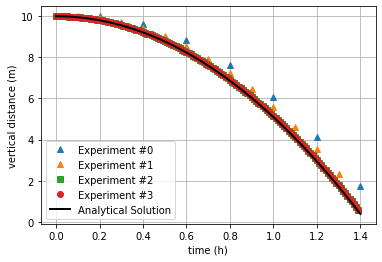

In [16]:
fig, ax = plt.subplots()
ax.set_title('')
ax.set_xlabel('time (h)')
ax.set_ylabel('vertical distance (m)')

# numerical solutions
plt.plot(exp0_set[0], exp0_set[1], \
         marker='^', linewidth=0, \
         label='Experiment #0')
plt.plot(exp1_set[0], exp1_set[1], \
         marker='^', linewidth=0, \
         label='Experiment #1')
plt.plot(exp2_set[0], exp2_set[1], \
         marker='s', linewidth=0, \
         label='Experiment #2')
plt.plot(exp2_set[0], exp2_set[1], \
         marker='o', linewidth=0, \
         label='Experiment #3')


# analytical solution
x = np.linspace(0, 1.4, int(1.4/0.0001), endpoint=True)
y = 10 - 0 * x - 1 / 2 * 9.81 * x ** 2
plt.plot(x, y, linewidth=2, color="black", label='Analytical Solution')

plt.grid(True)
plt.legend()
plt.show()

- Compare analytical `(x(t)=x0-vo*t-1/2*gt**2)` to numerical one. We observe that the smaller the step size, the closer appoximation of numerical solution(s) is to the analytical solution.
- By observering `Experiment#0` on the graph, we can coclude that the greatest distance between analytical and numerical is at this point.
- And the distance minimized when approaching experiments with lower step sizes for example `Experiment#3` contains the smallest difference between the numerical and analytical solution.

### Part 4

In [17]:
def get_errors(steps, t_f=0.1):
    relative_errors = []
    absolute_errors = []
    
    for step in steps:
        t = int(t_f / step) + 1
        true_solution = np.linspace(0, t_f, t, endpoint=True)
        #print(t)
        #print('print solution: ', true_solution, true_solution.sum())
        
        total = 0
        absolute_error = 0
        relative_error = 0
        
        for i in range(t):
            absolute_error += abs(total - true_solution[i])
            
            if true_solution[i] == 0:
                relative_error += 0
            else:
                relative_error += abs((total - true_solution[i]) / true_solution[i])
            #print(i, total, true_solution[i], absolute_error)
            total += step
        
        absolute_errors.append(absolute_error)
        relative_errors.append(relative_error)
        
    return relative_errors, absolute_errors

step_sizes = [1e-2]
get_errors(step_sizes)

([2.5442610980993174e-16], [2.0816681711721685e-17])

[5e-08, 1e-06, 5e-07, 1e-05, 0.0001, 0.001, 0.01]
[1.9467002889312887e-06, 3.1802441420585866e-09, 8.057431488197847e-09, 2.7392819776535498e-11, 6.064017560661328e-13, 3.4382219293860317e-15, 2.0816681711721685e-17]


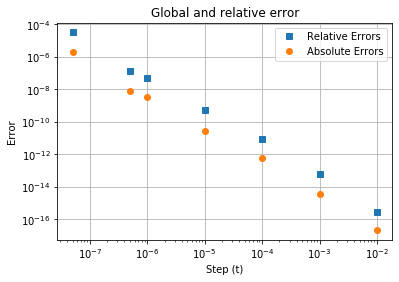

In [18]:
step_sizes = [.5e-7, 1e-6, .5e-6, 1e-5, 1e-4, 1e-3, 1e-2]
relative_errors, absolute_errors = get_errors(step_sizes)

print(step_sizes)
print(absolute_errors)

fig, ax = plt.subplots()
ax.set_title('Global and relative error')
ax.set_xlabel('Step (t)')
ax.set_ylabel('Error')
ax.set_xscale("log")
ax.set_yscale("log")

plt.plot(step_sizes, relative_errors, \
         marker='s', linewidth=0, \
         label='Relative Errors')

plt.plot(step_sizes, absolute_errors, \
         marker='o', linewidth=0, \
         label='Absolute Errors')

plt.grid(True)
plt.legend()
plt.show()

With smaller step size, we have a relatively higher accumulated absolute and relative errors, as shown in the graph.

With larger step sizes, the errors are smaller, in other words it has a smaller effect on the true solution. 

### Part 5

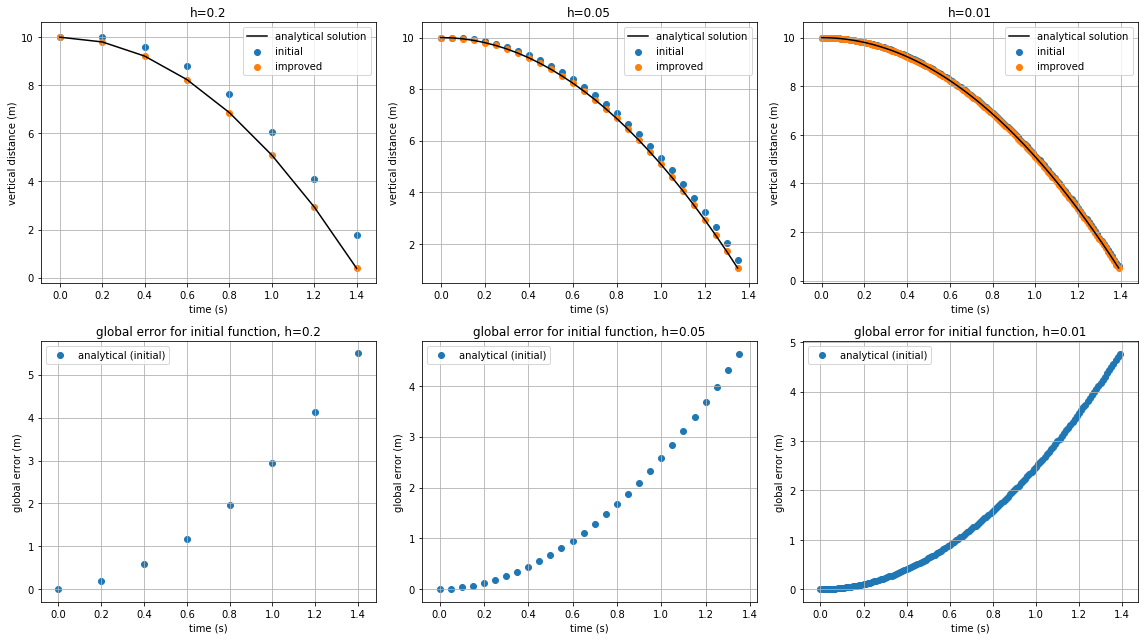

In [78]:
# Repeat the simulations you did in Part 4, except that now you use x1 from 
# equation (10) to initialize the model (ignore the last term)

# Note: it looks like there is a typo in this task - I think it should be referring to Part 2 (and 3) instead

def height_above_ground_numerical_improved(t_f, h, x0=10.0, v0=0.0, g=9.81):
    """
    :param t_f: Maximum simulation time (seconds).
    :param h: Constant time step (seconds).
    :param x0: Initial height of the object (default: 10.0 m).
    :param v0: Velocity at time zero (>0 for downward direction)
               (default: 0 m/s).
    :param g: Gravitational constant (default: 9.81 m/s^2).
    :return: A tuple of arrays (t, x(t)) containing the numerical
             solution at times 0, h, 2*h, 3*h, ..., N*h <= t_f.
    """
    t = 0
    t_array = []
    
    while t <= t_f:
        t_array.append(t)
        t += h
    
    x_prev = x0
    # in previous function we used (x0 - v0 * h) formula to calculate the x1
    # in this function have a better approximation of x1
    x_current = x_prev - v0 * h - 1 / 2 * g * h ** 2
    x_next = None
    
    x_array = [x_prev, x_current]
    
    for _ in range(2, len(t_array)):
        x_next = 2 * x_current - x_prev - g * h ** 2
        x_array.append(x_next)
        (x_prev, x_current) = (x_current, x_next)
    
    return t_array, x_array

def get_errors(exp_set, analytical_set):
    total = 0
    result = []
    
    for i in range(len(exp_set)):
        total += abs(exp_set[i] - analytical_set[i])
        result.append(total)
        
    return result

# defining t_f (the time we run the experiment)
t_f = 1.4


fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(16, 9))

# experiment #0
h = 0.2

exp0_set = height_above_ground_numerical(t_f, h)
exp0_set_improved = height_above_ground_numerical_improved(t_f, h)
exp0_analytical_set = 10 - 0 * np.array(exp0_set[0]) - 1 / 2 * 9.81 * np.array(exp0_set[0]) ** 2
exp0_analytical_global_errors = get_errors(exp0_set[1], exp0_analytical_set)

ax0.set_title('h={}'.format(str(h)))
ax0.set_xlabel('time (s)')
ax0.set_ylabel('vertical distance (m)')
ax0.scatter(exp0_set[0], exp0_set[1], label='initial')
ax0.scatter(exp0_set[0], exp0_set_improved[1], label='improved')
ax0.plot(exp0_set[0], exp0_analytical_set, label='analytical solution', color="black")
ax0.grid(True)
ax0.legend()

ax3.set_title('global error for initial function, h={}'.format(str(h)))
ax3.set_xlabel('time (s)')
ax3.set_ylabel('global error (m)')
ax3.scatter(exp0_set[0], exp0_analytical_global_errors, label='analytical (initial)')
ax3.grid(True)
ax3.legend()

# experiment #1
h = 0.05

exp1_set = height_above_ground_numerical(t_f, h)
exp1_set_improved = height_above_ground_numerical_improved(t_f, h)
exp1_analytical_set = 10 - 0 * np.array(exp1_set[0]) - 1 / 2 * 9.81 * np.array(exp1_set[0]) ** 2
exp1_analytical_global_errors = get_errors(exp1_set[1], exp1_analytical_set)

ax1.set_title('h={}'.format(str(h)))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('vertical distance (m)')
ax1.scatter(exp1_set[0], exp1_set[1], label='initial')
ax1.scatter(exp1_set[0], exp1_set_improved[1], label='improved')
ax1.plot(exp1_set[0], exp1_analytical_set, label='analytical solution', color="black")
ax1.grid(True)
ax1.legend()

ax4.set_title('global error for initial function, h={}'.format(str(h)))
ax4.set_xlabel('time (s)')
ax4.set_ylabel('global error (m)')
ax4.scatter(exp1_set[0], exp1_analytical_global_errors, label='analytical (initial)')
ax4.grid(True)
ax4.legend()

# experiment #2
h = 0.01

exp2_set = height_above_ground_numerical(t_f, h)
exp2_set_improved = height_above_ground_numerical_improved(t_f, h)
exp2_analytical_set = 10 - 0 * np.array(exp2_set[0]) - 1 / 2 * 9.81 * np.array(exp2_set[0]) ** 2
exp2_analytical_global_errors = get_errors(exp2_set[1], exp2_analytical_set)

ax2.set_title('h={}'.format(str(h)))
ax2.set_xlabel('time (s)')
ax2.set_ylabel('vertical distance (m)')
ax2.scatter(exp2_set[0], exp2_set[1], label='initial')
ax2.scatter(exp2_set[0], exp2_set_improved[1], label='improved')
ax2.plot(exp2_set[0], exp2_analytical_set, label='analytical solution', color="black")
ax2.grid(True)
ax2.legend()

ax5.set_title('global error for initial function, h={}'.format(str(h)))
ax5.set_xlabel('time (s)')
ax5.set_ylabel('global error (m)')
ax5.scatter(exp2_set[0], exp2_analytical_global_errors, label='analytical (initial)')
ax5.grid(True)
ax5.legend()

plt.tight_layout()
plt.show()


The improved function gives us a better approximation of the analytical solution. This can be observed in minimized global and relative errors, such as seen above.

When using smaller step sizes, the initial function gives us a better approximation of the analytical solution, providing results that are similar to the improved function.  

### Part 6 (incomplete)

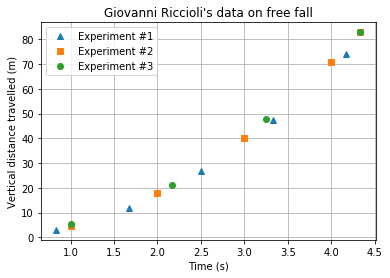

In [20]:
df = pd.read_csv("data/riccioli.dat", sep="\t", skiprows=8)

# converting Roman feet to meters 
df['Distance'] = 0.296 * df['Distance']

fig, ax = plt.subplots()
ax.set_title('Giovanni Riccioli\'s data on free fall')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertical distance travelled (m)')

#To plot the data that corrosponds to each Experiment, there is a need to specify
#the specific experiment the data belongs to. Therefore divides data into
#Experiment == 1--2--3

plt.plot('Time', 'Distance', data=df.loc[df['Experiment'] == 1], \
         marker='^', linewidth=0, \
         label='Experiment #1')
plt.plot('Time', 'Distance', data=df.loc[df['Experiment'] == 2], \
         marker='s', linewidth=0, \
         label='Experiment #2')
plt.plot('Time', 'Distance', data=df.loc[df['Experiment'] == 3], \
         marker='o', linewidth=0, \
         label='Experiment #3')

plt.grid(True)
plt.legend()
plt.show()


## Excercise 4

### Part 1


In [21]:
r_ice = 917 # kg/m^3
r_iw = 1000 # kg/m^3
r_sw = 1030 # kg/m^3

v_ice_km = 15 * 1e3 # km^3
print('ice volume (km^3):', v_ice_km)

v_ice_m = v_ice_km * (1000 ** 3) # m^3
print('ice volume (m^3):', v_ice_m)

m_ice = r_ice * v_ice_m # kg
print('ice mass (kg):', m_ice)

m_iw = m_ice # kg
print('ice water mass (kg):', m_iw)

v_iw = m_iw / r_iw # m^3
print('ice water volume (m^3):', v_iw)

v_dw = r_iw / r_sw * v_iw
print('displaced water volume (m^3):', v_dw)

v_net = v_iw - v_dw
print('net contribution (m^3):', v_net)

ice volume (km^3): 15000.0
ice volume (m^3): 15000000000000.0
ice mass (kg): 1.3755e+16
ice water mass (kg): 1.3755e+16
ice water volume (m^3): 13755000000000.0
displaced water volume (m^3): 13354368932038.836
net contribution (m^3): 400631067961.16406


### Part 2

In [22]:
from math import pi

r_earth_km = 6371
print('earth radius (km)', r_earth_km) #Radius of earth

s_earth_km = 4 * pi * (r_earth_km ** 2)
print('earth area (km^2)', s_earth_km) #Area of the earth

s_water_km = s_earth_km * 0.71
print('water area (km^2)', s_water_km) #Area of the water contained on earth

s_water_m = s_water_km * (1000 ** 2)
print('water area (m^2)', s_water_m) #Volume of 

h_water_m = v_net / s_water_m
print('water rise (m)', h_water_m)

earth radius (km) 6371
earth area (km^2) 510064471.90978825
water area (km^2) 362145775.0559496
water area (m^2) 362145775055949.6
water rise (m) 0.0011062701695174234


### Part 3

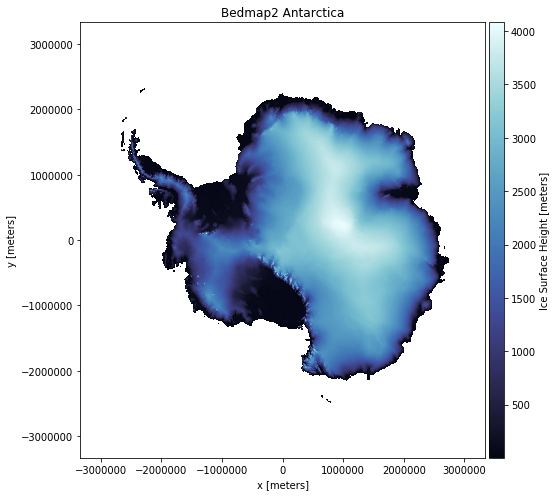

In [32]:
bedmap = rh.fetch_bedmap2(datasets=["thickness","surface","bed"])
plt.figure(figsize=(8, 7))
ax = plt.subplot(111)
bedmap.surface.plot.pcolormesh(ax=ax,cmap=cmocean.cm.ice,cbar_kwargs=dict(pad=0.01, aspect=30))
plt.title("Bedmap2 Antarctica")
plt.tight_layout()
plt.show()

### Part 4

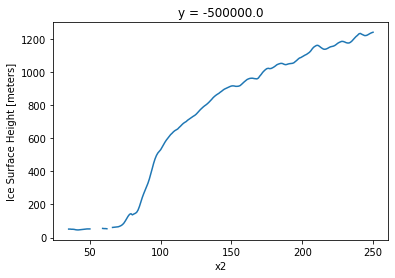

In [33]:
# Extract cross section using the original coordinates
bed1d=bedmap.sel(y=-0.5e6, x=slice(-1.6e6,-1.35e6))

# Add a second x-coordinate to make prettier plots
# (shift x-axis to start at zero, and convert from m to km)
bed1d=bed1d.assign_coords({"x2":((bed1d.x+1.6e6)/1e3)})

bed1d.surface.plot(x='x2')

In [34]:
surface = bed1d['surface'].values
thickness = bed1d['thickness'].values
bed = bed1d['bed'].values

freeboard = (0 - (surface - thickness) * r_iw / r_ice) + (surface - thickness)

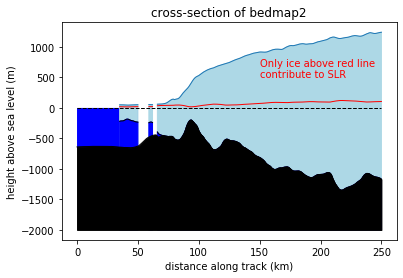

In [35]:
fig, ax = plt.subplots()
ax.set_title('cross-section of bedmap2')
ax.set_xlabel('distance along track (km)')
ax.set_ylabel('height above sea level (m)')

x = (bed1d.x + 1.6e6) / 1e3 # x-coord slice

plt.plot(x, np.zeros(len(x)), linestyle='--', color='black', linewidth=1, label='surface')
plt.plot(x, surface, linewidth=1, label='surface')
plt.plot(x, freeboard, color='red', linewidth=1, label='freeboard')
plt.plot(x, surface-thickness, color='black', linewidth=1, label='surface-thickness')
plt.plot(x, bed, color='black', linewidth=1, label='bed')

ax.fill_between(x[0:50], bed[0:50], 0, color='blue') # small hack :)
ax.fill_between(x, bed, surface, color='lightblue')
ax.fill_between(x, -2000, surface-thickness, color='blue')
ax.fill_between(x, -2000, bed, color='black')

plt.text(150, 500, 'Only ice above red line\ncontribute to SLR', color='red')
plt.show()

- The bedrock could have a relation to how the ice is developing, for example at the highest peak of the bedrock, making a narrow passage for waterflow to circulate underneath the ice, and we perhaps observe that the peak of the bedrock is consistent with a increase of the thickness of the ice layers. The ice surface has the steepest slope in this area, but even as the bedrock moves to shallower depth, the ice seems to be increasing in altitude even though ice does has more depth beneath mean sea level.

### Part 5

In [36]:
# Need to import the datasets of the thickness and surface to make the calculations
bedmap = rh.fetch_bedmap2(datasets=["thickness","surface"]) 

bed3d = bedmap.sel()

#This function will import values from thickness and surface datasets
surface = bed3d['surface'].values
thickness = bed3d['thickness'].values

#Estimate of freeboard limit
freeboard = (0 - (surface - thickness) * r_iw / r_ice) + (surface - thickness) 
#Estimate of SLR volume in kilometer scale(km^3)
slr_volume_km = surface - freeboard
#SLR volume converted from kilometer(km^3) scale to meter scale(m^3).
slr_volume_m = slr_volume_km * 1e6

#Total SLR volume estimated while running np.isnan fucntion which removes non-numerical values, then will only in numerical 
#values(==True) will be summarized 
total_slr_volume_m = slr_volume_m[np.isnan(slr_volume_m)==False].sum() # total SRL volume (m^3)
print('total SLR volume (m^3):', total_slr_volume_m)

#Area of earth surface converted to meter scale(m^2)
s_earth_m = s_earth_km * 1e6 # earth surface (m^2)

# SRL height in square meters(m^2) if volume was spread evenly over the earth surface
spread_slr_height = total_slr_volume_m / s_earth_m 
print('SLR height (m^2):', spread_slr_height)
    


total SLR volume (m^3): 2.6819354467496132e+16
SLR height (m^2): 52.580322575847816


### Part 6

- The bedmap can be used to correlate the ice thickness in relation to the bedrock, for example at the start of the drastic elevation increase of the ice, it can be observered that the bedrock at a shallower depth and creates a narrow passage for the waterflow/ice. After this point, the ice thickness continues to increase even though bedrock elevation is decreasing. This was not a conclusion for the thickness increase, but to look at these types of data, it is possible to explore the opportunity to make relationships between physical concepts based on the available data presented.


- This model lacks a temperature to be able to calculate as an array how the ice will melt corrosponding to an eventual increase in global temperature. In the models current state, the answer is that for Antartica, SLR would be ~52.58 meters but that is if ALL of the ice should suddenly disappear, which would not correspond to the expected reality. A good improvement to the model would be to include how much ice will disappear for each degree of Celsius increase, and make the calculation on how much SLR there will be attributed with respect to global temperature increase.


- The data has not been cleaned for numerical round off errors, thus it should be sufficent to say that we assume there are numerical errors within the model, but the size of errors is uncertain with respect to the data we utilized. For example, if the cell size can be reduced from 1000x1000 meters, we coud get a better approximation on the actual SLR results.

## Experiences during Project 1

### Learning output


- Different approaches to use Python as a tool to handle data packages and create estimate(s) from the data itself and create useful functions which can make the neccesary calculations without repeating (copy-pasting) the code.

- How to succesfully utilize directories, by importing the necessary files.

### Comments

- The assignment was a quite extensive and there was a need to use a lot of time to work out each question, but was interesting topics throughout the whole assignment. The learning output for doing this amount of work is GREAT. To summarize needed a lot of time but provided good learning.

- Some issues when importing the rockhound file (Excercise4 P:3) but learned to problem solve this issue when and install the right GDAL version and rostario version to remove the install error message, and succesfully import the datapackage, through `pip install rockhound` rather than using `conda-forge install rockhound`.